In [1]:
import numpy as np
from gpcam import GPOptimizer

from numpy.random import default_rng

import pandas as pd

from scipy.optimize import minimize

import matplotlib.pyplot as plt
import plotly.graph_objects as go

import os
import csv

import random

from sklearn.preprocessing import MinMaxScaler


In [2]:
# Plotting the results on a 3D plot
def plot(X, Y, Z, W ,W1, data=None, filename=None):

    axis_title_size = 40
    axis_ticks_size = 18

    fig = go.Figure()

    if data is not None:
        fig.add_trace(go.Scatter3d(
            x=data[:, 0],
            y=data[:, 1],
            z=data[:, 3],
            mode='markers',
            marker=dict(
                size=12,
                color=data[:, 4],
                opacity=0.8)
            ))

    for i in range(0, len(Z[0, 0, :]), 4):
        fig.add_trace(go.Surface(
            x=X[:, :, i],
            y=Y[:, :, i],
            z=Z[:, :, i],
            surfacecolor=W[:, :, i],
            cmin=np.min(W1),
            cmax=np.max(W1),
            colorbar=dict(
                title='Energy',
                tickvals=[round(np.min(W1)+0.01*np.min(W1), 2), round(np.max(W1)- 0.01*np.max(W1), 2)],
                #ticktext=['Min', 'Max'],
                ticks='outside',
                tickfont=dict(size=axis_ticks_size*2),
                len=0.8,  # Adjust the length of the color bar (0.5 represents half the length)
            )
        ))

    fig.update_layout(
        #title='Plot',
        autosize=True,
        width=1000,
        height=1000,
        margin=dict(l=65, r=50, b=65, t=90),
        scene=dict(
            xaxis_title='SOC',
            yaxis_title='C-rate',
            zaxis_title='Cycle',
            xaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                tickvals=np.linspace(20, 80, 4),  # Set the x-axis tick values (4 evenly spaced values)
                ticktext=np.array([20,40,60,80]),  # Set the x-axis tick labels (same as tick values)
                range=[20, 80],
             ),
            yaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                tickvals=np.linspace(2, 8, 4),  # Set the y-axis tick values (4 evenly spaced values)
                ticktext=np.array([2,4,6,8]),  # Set the y-axis tick labels (same as tick values)
                range=[2, 8],

            ),
            zaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                tickvals=np.linspace(10, 40, 4),  # Set the y-axis tick values (4 evenly spaced values)
                ticktext=np.array([10,20,30,40]),  # Set the y-axis tick labels (same as tick values)
                range=[0, 40],
            ),

        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)  # Adjust these values to control zoom
        )
      )

    )

    if filename is not None:
        # Use the write_image method to save the plot as a PDF
        fig.write_image(filename, format="pdf")


    fig.show()



# Plotting the results on a 3D plot
def plot_Uncertainty(X, Y, Z, W, W1, data=None, filename=None):
    fig = go.Figure()

    axis_title_size = 40
    axis_ticks_size = 18

    for i in range(0, len(Z[0, 0, :]),2):
        fig.add_trace(go.Surface(
            x=X[:, :, i],
            y=Y[:, :, i],
            z=Z[:, :, i],
            surfacecolor=W[:, :, i],
            cmin=0,
            cmax=np.max(W1),
            colorscale='Viridis',  # Set the Viridis colormap
            colorbar= dict(
                title=' ',
                tickvals=[round(np.min(W1)+ 0.05*np.min(W1),2), round(np.max(W1)- 0.02*np.max(W1),2)],
                #ticktext=['Min', 'Max'],
                ticks='outside',
                tickfont=dict(size=axis_ticks_size*2),
                len=0.8,  # Adjust the length of the color bar (0.5 represents half the length)
            )
        ))

    fig.update_layout(
        #title='Plot',
        autosize=True,
        width=1000,
        height=1000,
        margin=dict(l=65, r=50, b=65, t=90),
        scene=dict(
            xaxis_title='SOC',
            yaxis_title='C-rate',
            zaxis_title='Cycle',
            xaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                tickvals=np.linspace(20, 80, 4),  # Set the x-axis tick values (4 evenly spaced values)
                ticktext=np.array([20,40,60,80]),  # Set the x-axis tick labels (same as tick values)
                range=[20, 80],
             ),
            yaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                tickvals=np.linspace(2, 8, 4),  # Set the y-axis tick values (4 evenly spaced values)
                ticktext=np.array([2,4,6,8]),  # Set the y-axis tick labels (same as tick values)
                range=[2, 8],

            ),
            zaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                tickvals=np.linspace(10, 40, 4),  # Set the y-axis tick values (4 evenly spaced values)
                ticktext=np.array([10,20,30,40]),  # Set the y-axis tick labels (same as tick values)
                range=[0, 40],
            ),

        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)  # Adjust these values to control zoom
        )
        )
    )


    if filename is not None:
        # Use the write_image method to save the plot as a PDF
        fig.write_image(filename, format="pdf")

    fig.show()

def plot_Scatter(data, W1):
    
    axis_title_size = 40
    axis_ticks_size = 18
    
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
        x=data[:, 0],
        y=data[:, 1],
        z=data[:, 2],
        mode='markers',
        marker=dict(size=12,
                    color=data[:, 3],
                    opacity=0.8,
                    cmin=np.min(W1),
                    cmax=np.max(W1),
                    colorbar=dict(title='Energy',
                                  tickmode='array',
                                  tickvals=[np.min(W1)+0.01*np.min(W1), np.max(W1)- 0.01*np.max(W1)],
                                  ticktext=['Min', 'Max'],
                                  ticks='outside',
                                  tickfont=dict(size=axis_ticks_size*2),
                                  len=0.8  # Adjust the length of the color bar (0.5 represents half the length)
                                  )
                                )
    ))

    fig.update_layout(
        #title='Plot',
        autosize=True,
        width=1000,
        height=1000,
        margin=dict(l=65, r=50, b=65, t=90),
        scene=dict(
            xaxis_title='SOC',
            yaxis_title='C-rate',
            zaxis_title='Cycle',
            xaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                tickvals=np.linspace(20, 80, 4),  # Set the x-axis tick values (4 evenly spaced values)
                ticktext=np.array([20,40,60,80]),  # Set the x-axis tick labels (same as tick values)
                range=[20, 80],
             ),
            yaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                tickvals=np.linspace(2, 8, 4),  # Set the y-axis tick values (4 evenly spaced values)
                ticktext=np.array([2,4,6,8]),  # Set the y-axis tick labels (same as tick values)
                range=[2, 8],

            ),
            zaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                tickvals=np.linspace(10, 40, 4),  # Set the y-axis tick values (4 evenly spaced values)
                ticktext=np.array([10,20,30,40]),  # Set the y-axis tick labels (same as tick values)
                range=[0, 40],

            ),
           camera=dict(
                eye=dict(x=1.4, y=1.4, z=1.4)  # Adjust these values to control zoom
        )
        )
    )


    fig.show()
    
def plot_Scatter2(data, W1):
    
    axis_title_size = 40
    axis_ticks_size = 18
    
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
        x=data[:, 0],
        y=data[:, 1],
        z=data[:, 2],
        mode='markers',
        marker=dict(size=12,
                    color=W1,
                    opacity=0.8,
                    cmin=np.min(W1),
                    cmax=np.max(W1),
                    colorbar=dict(title='Temperature',
                                  tickmode='array',
                                  #tickvals=[np.min(W1)+0.01*np.min(W1), np.max(W1)- 0.01*np.max(W1)],
                                  #ticktext=['Min', 'Max'],
                                  ticks='outside',
                                  tickfont=dict(size=axis_ticks_size*2),
                                  len=0.8  # Adjust the length of the color bar (0.5 represents half the length)
                                  )
                                )
    ))

    fig.update_layout(
        #title='Plot',
        autosize=True,
        width=1000,
        height=1000,
        margin=dict(l=65, r=50, b=65, t=90),
        scene=dict(
            xaxis_title='SOC',
            yaxis_title='Cycle',
            zaxis_title='Energy',
            xaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                #tickvals=np.linspace(20, 80, 4),  # Set the x-axis tick values (4 evenly spaced values)
                #ticktext=np.array([20,40,60,80]),  # Set the x-axis tick labels (same as tick values)
                #range=[20, 80],
             ),
            yaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                #tickvals=np.linspace(2, 8, 4),  # Set the y-axis tick values (4 evenly spaced values)
                #ticktext=np.array([2,4,6,8]),  # Set the y-axis tick labels (same as tick values)
                #range=[2, 8],

            ),
            zaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                #tickvals=np.linspace(10, 40, 4),  # Set the y-axis tick values (4 evenly spaced values)
                #ticktext=np.array([10,20,30,40]),  # Set the y-axis tick labels (same as tick values)
                #range=[0, 40],

            ),
           camera=dict(
                eye=dict(x=1.4, y=1.4, z=1.4)  # Adjust these values to control zoom
        )
        )
    )


    fig.show()
    
def plot_Scatter3(data, W1):
    
    axis_title_size = 40
    axis_ticks_size = 18
    
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
        x=data[:, 0],
        y=data[:, 1],
        z=data[:, 2],
        mode='markers',
        marker=dict(size=12,
                    color=W1,
                    opacity=0.8,
                    cmin=np.min(W1),
                    cmax=np.max(W1),
                    colorbar=dict(title='Temperature',
                                  tickmode='array',
                                  #tickvals=[np.min(W1)+0.01*np.min(W1), np.max(W1)- 0.01*np.max(W1)],
                                  #ticktext=['Min', 'Max'],
                                  ticks='outside',
                                  tickfont=dict(size=axis_ticks_size*2),
                                  len=0.8  # Adjust the length of the color bar (0.5 represents half the length)
                                  )
                                )
    ))

    fig.update_layout(
        #title='Plot',
        autosize=True,
        width=1000,
        height=1000,
        margin=dict(l=65, r=50, b=65, t=90),
        scene=dict(
            xaxis_title='C-Rate',
            yaxis_title='Cycle',
            zaxis_title='Energy',
            xaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                #tickvals=np.linspace(20, 80, 4),  # Set the x-axis tick values (4 evenly spaced values)
                #ticktext=np.array([20,40,60,80]),  # Set the x-axis tick labels (same as tick values)
                #range=[20, 80],
             ),
            yaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                #tickvals=np.linspace(2, 8, 4),  # Set the y-axis tick values (4 evenly spaced values)
                #ticktext=np.array([2,4,6,8]),  # Set the y-axis tick labels (same as tick values)
                #range=[2, 8],

            ),
            zaxis=dict(
                title_font=dict(size=axis_title_size),
                tickfont=dict(size=20),
                #tickvals=np.linspace(10, 40, 4),  # Set the y-axis tick values (4 evenly spaced values)
                #ticktext=np.array([10,20,30,40]),  # Set the y-axis tick labels (same as tick values)
                #range=[0, 40],

            ),
           camera=dict(
                eye=dict(x=1.4, y=1.4, z=1.4)  # Adjust these values to control zoom
        )
        )
    )


    fig.show()

# Defining the Design Space

In [3]:
# Define the grid size
n = 20

# Design Space Limits
soc_low = 20
soc_high = 80
crate_low = 2
crate_high = 8
temp_low = 285 
temp_high = 291
loop_low = 0
loop_high = 40

# Create a design space
X_space = np.linspace(soc_low,soc_high,n)
Y_space = np.linspace(crate_low,crate_high,n)
W_space = np.linspace(temp_low,temp_high,n)
Z_space = np.linspace(loop_low,loop_high,n)

x_space,y_space,w_space,z_space = np.meshgrid(X_space,Y_space,W_space,Z_space)

# x-space varies in the second dimension, x_space[0,:,0,0]
# y-space varies in the first dimension, y_space[:,0,0,0]
# w-space varies in the third dimension, w_space[0,0,:,0]
# z-space varies in the fourth dimension, z_space[0,0,0,:]


# Reshape the arrays into a 2-column array with 10000 rows
my_space = np.vstack((x_space.reshape(-1), y_space.reshape(-1), w_space.reshape(-1), z_space.reshape(-1))).T

#############################################################
# Used for the uncertainty Model

n2 = 11
# Create a design space
x_space2 = np.linspace(soc_low,soc_high,n2)
y_space2 = np.linspace(crate_low,crate_high,n2)
w_space2 = np.linspace(temp_low,temp_high,n2)
z_space2 = np.linspace(loop_low,loop_high,n2)

x_space2,y_space2,w_space2,z_space2 = np.meshgrid(x_space2,y_space2,w_space2,z_space2)  

# Reshape the arrays into a 2-column array with 10000 rows
my_space2 = np.vstack((x_space2.reshape(-1), y_space2.reshape(-1), w_space2.reshape(-1), z_space2.reshape(-1))).T


# Experimental Data


In [4]:
# Define the directory path containing the files
directory_path = r'/Users/MAlghalayini/Desktop/Codes/Experimental Data'

# List of temperature values
temperatures = ['285', '288', '291']  # Add more temperatures as needed
#temperatures = ['285']  # Add more temperatures as needed

# Create an empty DataFrame to store the combined data
combined_data_exp = pd.DataFrame()

my_cell_id_counter = 0

for temp in temperatures:
    # Load the "Fade_Rates_Table_{temp}.csv" file
    fade_rates_data = pd.read_csv(os.path.join(directory_path, f'Fade_Rates_Table_{temp}.csv'))

    # Loop through files in the directory for the current temperature
    for filename in os.listdir(directory_path):
        if filename.startswith(f"slow_cyclesDCW_AGE_{temp}K") and filename.endswith(".csv"):
            file_path = os.path.join(directory_path, filename)
        
            # Load data from the current file
            df = pd.read_csv(file_path)
        
            # Extract the desired response columns
            my_response = ['Discharge Energy (Wh)', 'Coulombic Efficiency']
            df_response = df[my_response]

            # Add SOC and C-rate data from fade_rates_data based on the index
            index_value = int(filename.split('-')[1].split('.')[0])  # Extract the index from the filename
        
            # Filter the "fade_rates_data" DataFrame to find the matching row
            filtered_data = fade_rates_data[fade_rates_data['Index'] == index_value]
            soc_value = filtered_data.iloc[0]['SOC [%]']
           
            crate_value = filtered_data.iloc[0]['C-rate']
            
            # Create a Series with repeated SOC values to match the number of rows in df_response
            soc_series = pd.Series([soc_value] * len(df_response), name='SOC [%]')

            # Create a Series with repeated C-rate values to match the number of rows in df_response
            crate_series = pd.Series([crate_value] * len(df_response), name='C-rate')

            # Create a Series with repeated Cell ID values to match the number of rows in df_response
            cellID_series = pd.Series([my_cell_id_counter] * len(df_response), name='Cell ID')
            
            # Concatenate df_response, soc_series, crate_series, and temp_series
            selected_data = pd.concat([df['Cycle'], df['Loop Number'], soc_series, crate_series,df['Temperature (K)'], df_response, cellID_series], axis=1)

            # Append current data to the combined_data DataFrame
            combined_data_exp = pd.concat([combined_data_exp, selected_data])

            my_cell_id_counter = my_cell_id_counter + 1

print(combined_data_exp)

    Cycle  Loop Number  SOC [%]  C-rate  Temperature (K)  \
0       5            1     27.5    5.77              285   
1      12            2     27.5    5.77              285   
2      19            3     27.5    5.77              285   
3      26            4     27.5    5.77              285   
4      33            5     27.5    5.77              285   
..    ...          ...      ...     ...              ...   
35    250           36     62.5    5.10              291   
36    257           37     62.5    5.10              291   
37    264           38     62.5    5.10              291   
38    271           39     62.5    5.10              291   
39    278           40     62.5    5.10              291   

    Discharge Energy (Wh)  Coulombic Efficiency  Cell ID  
0                1.173848             99.889752        0  
1                1.180095             99.769393        0  
2                1.176993             99.801201        0  
3                1.170831             99.79

## Adding the repeated experiment

In [5]:
# Define the directory path containing the files
directory_path = r'/Users/MAlghalayini/Desktop/Codes/Experimental Data/Repeated Experiment at 291'

# Create an empty DataFrame to store the combined data
new_to_combine_data = pd.DataFrame()

this_soc = 30
this_crate = 7.46

# Loop through files in the directory for the current temperature
for filename in os.listdir(directory_path):
    if filename.startswith(f"slow_cyclesDCW_LDRD") and filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)

        # Load data from the current file
        df = pd.read_csv(file_path)
        
        # Extract the desired response columns
        my_response = ['Discharge Energy (Wh)', 'Coulombic Efficiency']
        df_response = df[my_response]
        
        # Create a Series with repeated SOC values to match the number of rows in df_response
        soc_series = pd.Series([this_soc] * len(df_response), name='SOC [%]')

        # Create a Series with repeated C-rate values to match the number of rows in df_response
        crate_series = pd.Series([this_crate] * len(df_response), name='C-rate')

        # Create a Series with repeated Cell ID values to match the number of rows in df_response
        cellID_series = pd.Series([my_cell_id_counter] * len(df_response), name='Cell ID')

        # Concatenate df_response, soc_series, crate_series, and temp_series
        selected_data = pd.concat([df['Cycle'], df['Loop Number'], soc_series, crate_series,df['Temperature (K)'], df_response, cellID_series], axis=1)

        # Append current data to the combined_data DataFrame
        new_to_combine_data = pd.concat([new_to_combine_data, selected_data])

        my_cell_id_counter = my_cell_id_counter + 1

print(len(new_to_combine_data))

# Combining both datasets

combined_data = pd.concat([combined_data_exp,new_to_combine_data])

print(len(combined_data))


357
1458


In [6]:
# Extract the data columns
loop_number = combined_data['Loop Number'].to_numpy()
c_rate = combined_data['C-rate'].to_numpy()
soc = combined_data['SOC [%]'].to_numpy()
temp = combined_data['Temperature (K)'].to_numpy()
discharge_energy = combined_data['Discharge Energy (Wh)'].to_numpy()

# Create the x_data and y_data arrays
x_data_all = np.column_stack((soc, c_rate, temp, loop_number))
#x_data_all = np.column_stack((soc, c_rate, loop_number))
y_data_all = np.array(discharge_energy)

# Removing the data where the Discharge Energy is 0
condition = y_data_all > 0.08
x_data = np.array(x_data_all[condition,:])
y_data = np.array(y_data_all[condition])

# ---------------------------------------------------------------------------------------------------------
# GP Model
# ---------------------------------------------------------------------------------------------------------

In [27]:
# Specified min and max values for each column
specified_min = np.min(my_space, axis=0)
specified_max = np.max(my_space, axis=0)

# Create the scaler object
scaler = MinMaxScaler()

# Fit the scaler to your custom range
scaler.fit(np.vstack([specified_min, specified_max]))

# Transform your data based on the fitted scaler
my_space_normalized = scaler.transform(my_space)

my_space2_normalized = scaler.transform(my_space2)


In [28]:
# Note: 
# x is the input space with the following variables:
# SOC, C_Rate, Temperature, Loop Number(cycle number)

# The kernel function takes the m+1 hyperparameters, where m is the number of dimnesions of the input space, here 4
# The hyperameters of the noise and the mean function come after those of the kernel function


def my_noise(x,hps,obj):
    
    my_slope     = hps[5]
    my_intercept = hps[6]

    my_s =  my_slope * x[:,3] + my_intercept

    noise = np.diag(my_s)
    
    return noise

# here I am assuming that the mean function is a piecewise function
def mean2(x,hps,obj):

    a = hps[7]*x[:,0] + hps[8]*x[:,1] + hps[9]*x[:,2] + hps[10]
    
    p = hps[11]*x[:,0]  + hps[12]*x[:,1]  + hps[13]*x[:,2] + hps[14]
    
    b = hps[15]*x[:,0] + hps[16]*x[:,1] + hps[17]*x[:,2] + hps[18]
    
    y = a * x[:,3] **p + b
        
    return y

In [29]:
# Initializing the GP Model

init_hyperparameters = np.array([100, 20, 1, 5, 5,                # Kernel
                                 0.06, 2,                      # Noise  
                                 -0.0001,-0.0001,-0.0001,                           # Mean (parameters coefficients of a)
                                 0.01,0.01,0.01,                           # Mean (parameters coefficients of p)
                                 0.01,0.01,0.01,                           # Mean (parameters coefficients of b)
                                 -0.001,0.1,0.1])                          # Mean (slopes for a, p, and b)
    

    
my_trained_hps = np.array([ 2.05359454e-01,  1.09905444e+00,  6.17617240e-01,  1.73893855e+00,
        1.86982200e+00,  2.05318276e-02,  4.87126750e-06, -7.10404783e-01,
       -1.33953193e+00,  9.77999573e-01, -6.92675256e-01, -9.08445224e-01,
       -9.62824434e-01,  2.14067129e-01,  2.13589859e+00,  7.28711213e-04,
        5.44933105e-01,  2.04797457e-01,  1.25915023e+00])

bounds = np.empty((19,2))


# Kernel Sq Exp 
bounds[0] = np.array([0.,20.])                             # Kernel Variance
bounds[1] = np.array([1e-2,2.])                             # Kernel Lengthscale: SOC
bounds[2] = np.array([1e-2,2.])                             # Kernel Lengthscale: C-rate
bounds[3] = np.array([1e-2,2.])                             # Kernel Lengthscale: Temperature
bounds[4] = np.array([1e-2,2.])                             # Kernel Lengthscale: Loop Number

# Noise
bounds[5] = np.array([0.,3.])                               # Noise slope
bounds[6] = np.array([0.,3.])                               # Noise Intercept

# Mean
# a
bounds[7] = np.array([-2.,2.])                             # Mean SOC weight for a
bounds[8] = np.array([-2.,2.])                             # Mean C-rate weight for a
bounds[9] = np.array([-2.,2.])                            # Mean temperature weight for a
bounds[10] = np.array([-2.,2.])                            # Mean intercept for a
# p
bounds[11] = np.array([-1.,1.])                            # Mean SOC weight for p
bounds[12] = np.array([-1.,1.])                            # Mean C-rate weight for p
bounds[13] = np.array([0.,1.])                            # Mean temperature weight for p
bounds[14] = np.array([2.,10.])                            # Mean intercept for p
# b
bounds[15] = np.array([-1.,1.])                            # Mean SOC weight for b
bounds[16] = np.array([-1.,1.])                            # Mean C-rate weight for b
bounds[17] = np.array([-3.,3.])                            # Mean temperature weight for b
bounds[18] = np.array([-3.,3.])                            # Mean intercept for b



# Fit and transform the data
x_data_normalized = scaler.transform(x_data)

my_gpo_a = GPOptimizer(x_data_normalized,y_data,
                     init_hyperparameters = my_trained_hps,  # we need enough of those for kernel, noise and prior mean functions
                     hyperparameter_bounds = bounds,
                    #noise_variances=np.ones(y_data.shape) * 0.001, #provding noise variances and a noise function will raise a warning 
                     compute_device='cpu', 
                     #gp_kernel_function=kernel, 
                     #gp_kernel_function_grad=None, 
                     gp_mean_function=mean2, 
                     gp_mean_function_grad=None,
                     gp_noise_function=my_noise)



#my_gpo_a.train(hyperparameter_bounds = bounds, method='global')

print("Training Complete")

C:\Anaconda3\envs\gpcam_May2024\lib\site-packages\gpcam\gp_optimizer.py:331: UserWarning: You are using the default kernel but a user-defined mean or noise function.                     Make sure the right hyperparameter indices are used in all functions.                     The default kernel function uses the first D + 1 hyperparameters
  super().__init__(


Training Complete


In [11]:

f = my_gpo_a.posterior_mean(my_space_normalized)["f(x)"]

f_re = f.reshape(n,n,n,n)

print("hps: ")
my_gpo_a.hyperparameters

hps: 


array([ 2.05359454e-01,  1.09905444e+00,  6.17617240e-01,  1.73893855e+00,
        1.86982200e+00,  2.05318276e-02,  4.87126750e-06, -7.10404783e-01,
       -1.33953193e+00,  9.77999573e-01, -6.92675256e-01, -9.08445224e-01,
       -9.62824434e-01,  2.14067129e-01,  2.13589859e+00,  7.28711213e-04,
        5.44933105e-01,  2.04797457e-01,  1.25915023e+00])

In [12]:

v = my_gpo_a.posterior_covariance(my_space2_normalized, add_noise=True)["v(x)"]

v_re = v.reshape(n2,n2,n2,n2)


In [14]:
# Posterior Mean

temp_of_interest = 285

my_indices = np.where((x_data[:,2] == temp_of_interest) & (x_data[:,3] < 41))

my_temperature_index = np.argmin(np.abs(w_space[0,0,:,0] - temp_of_interest))

data_to_be_plotted = np.column_stack([x_data[my_indices[0],:],y_data[my_indices[0]]])

plot(x_space[:,:,my_temperature_index,:],y_space[:,:,my_temperature_index,:],z_space[:,:,my_temperature_index,:],f_re[:,:,my_temperature_index,:], y_data, data_to_be_plotted)#,filename = "Trained GP Model.pdf")

In [21]:
# Uncertainty

temp_of_interest =291

my_temperature_index = np.argmin(np.abs(w_space2[0,0,:,0] - temp_of_interest))

plot_Uncertainty(x_space2[:,:,my_temperature_index,:],y_space2[:,:,my_temperature_index,:],z_space2[:,:,my_temperature_index,:],v_re[:,:,my_temperature_index,:], v_re)

In [ ]:
for i in range(16):
    index_of_interest = i

    soc_of_interest = crate_soc_data_291[index_of_interest,1]
    crate_of_interest = crate_soc_data_291[index_of_interest,0]
    
    print(soc_of_interest, crate_of_interest)

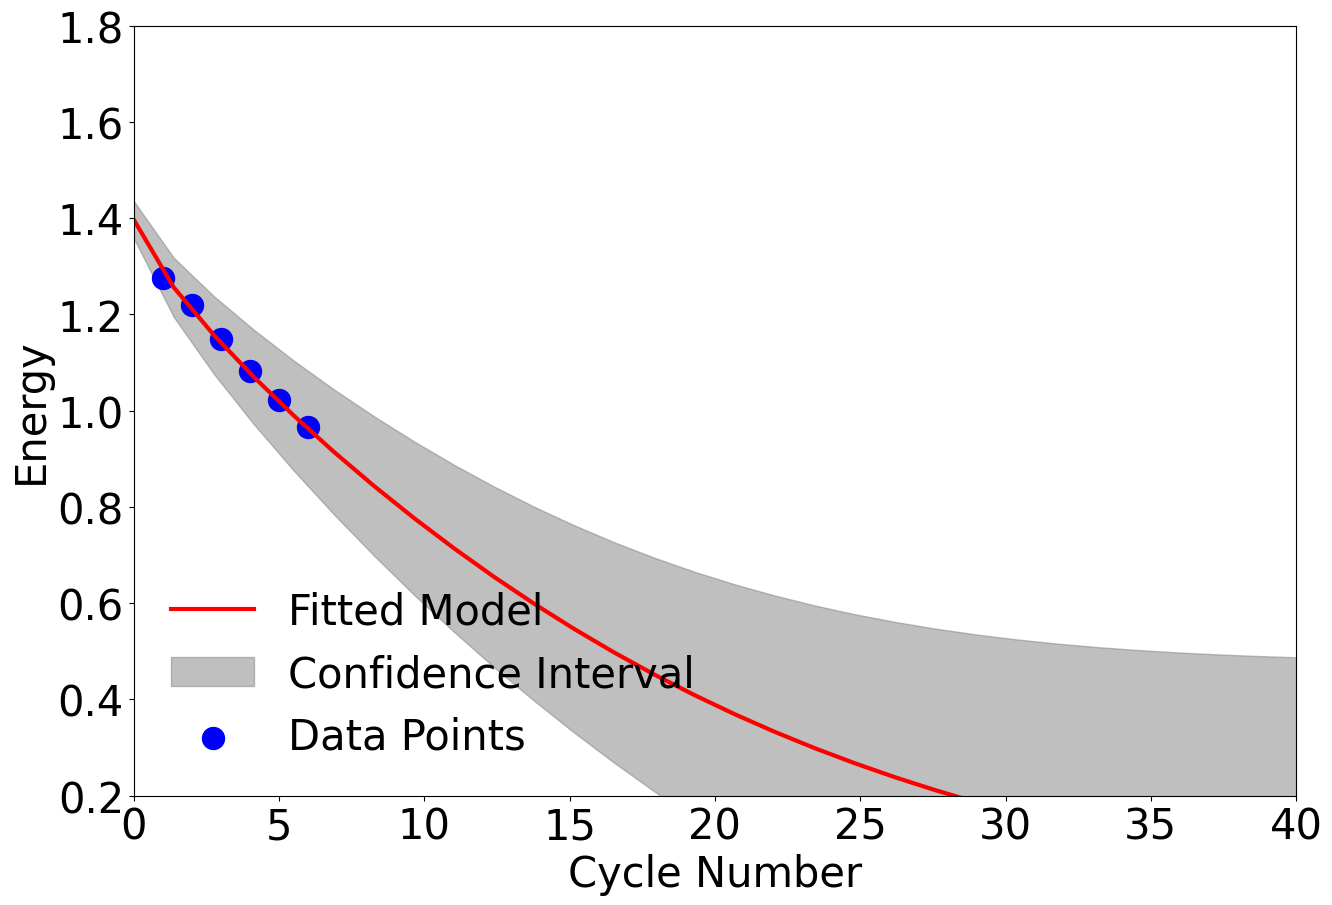

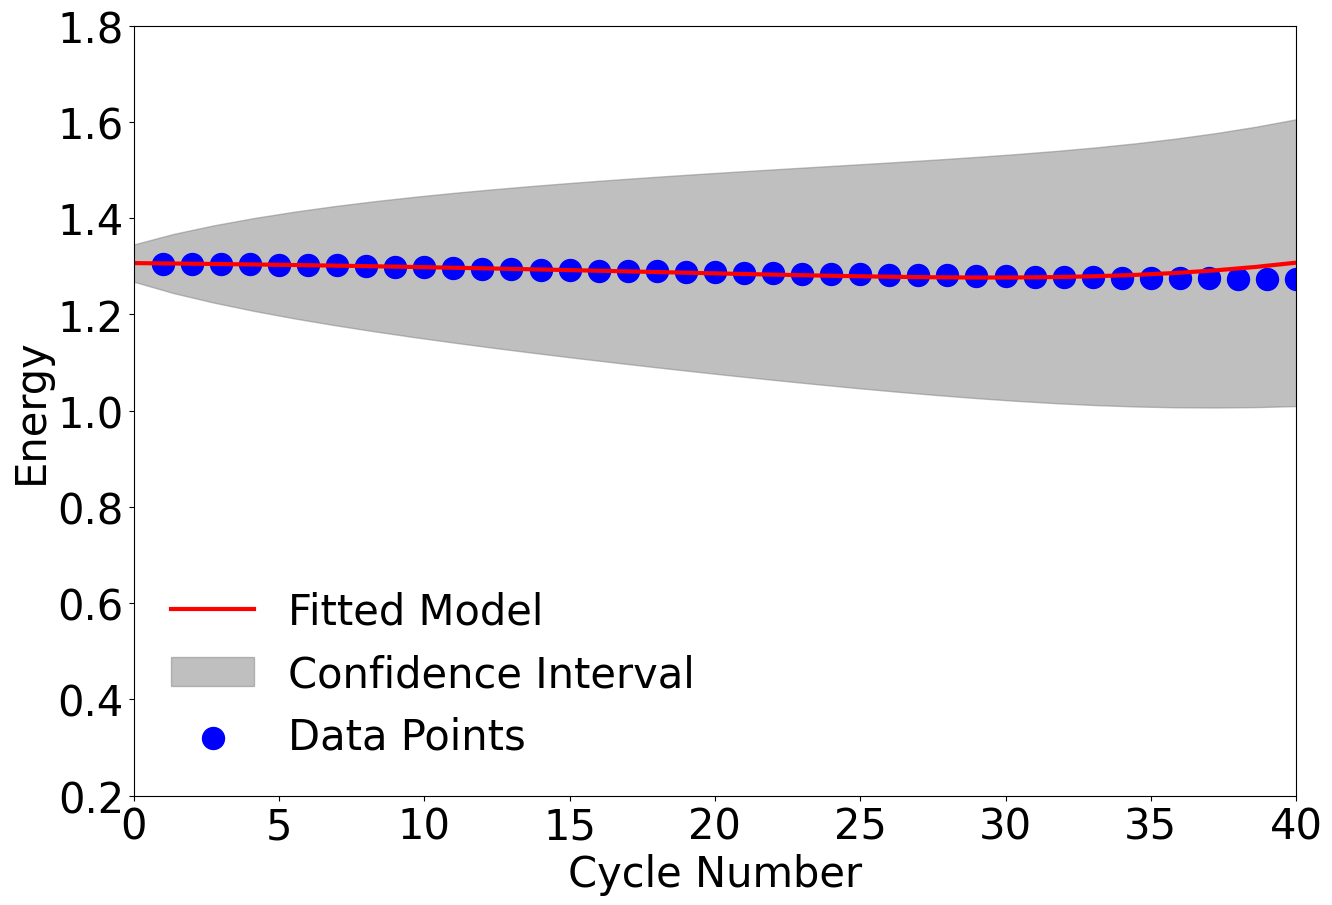

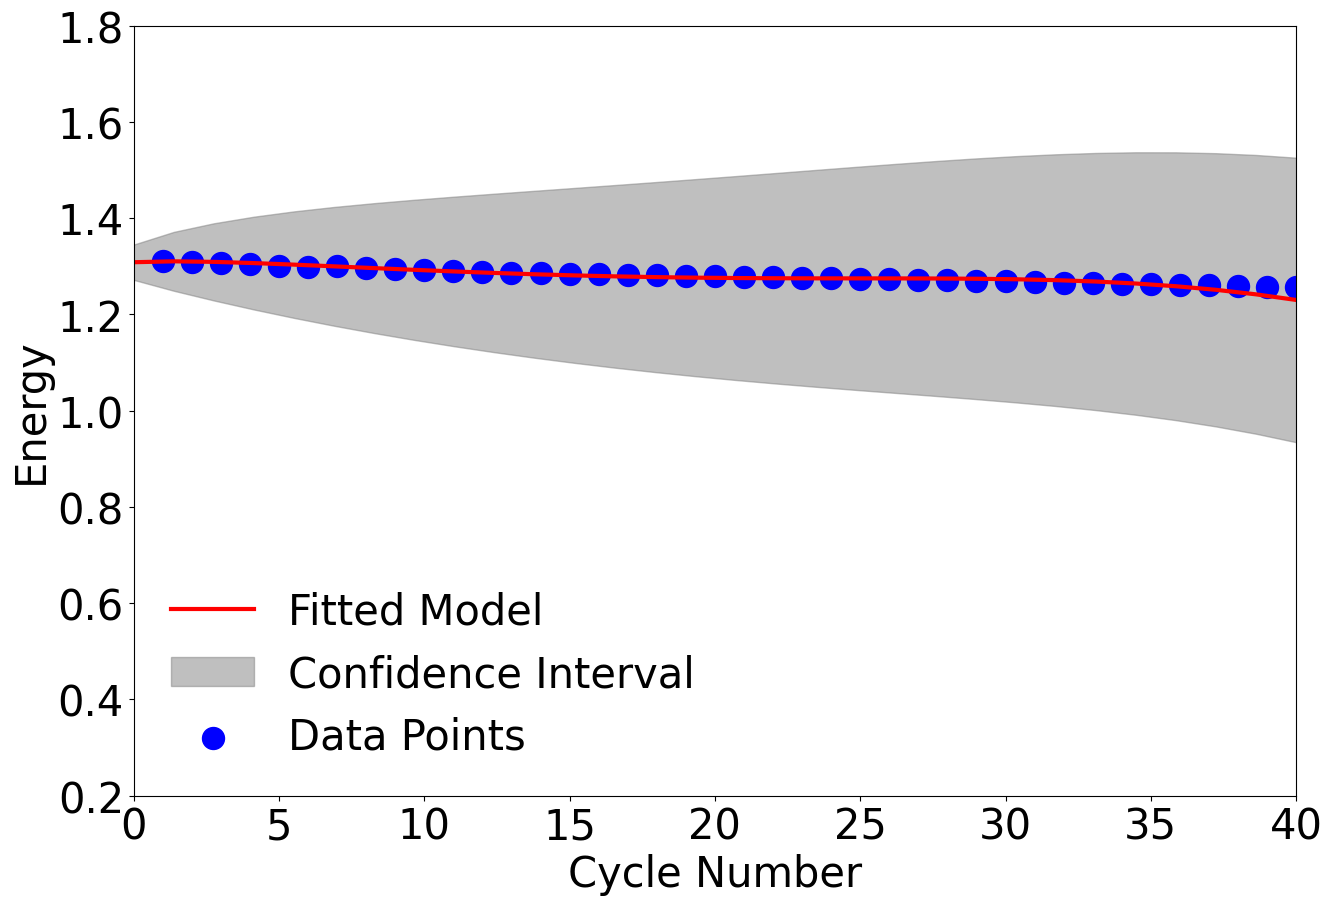

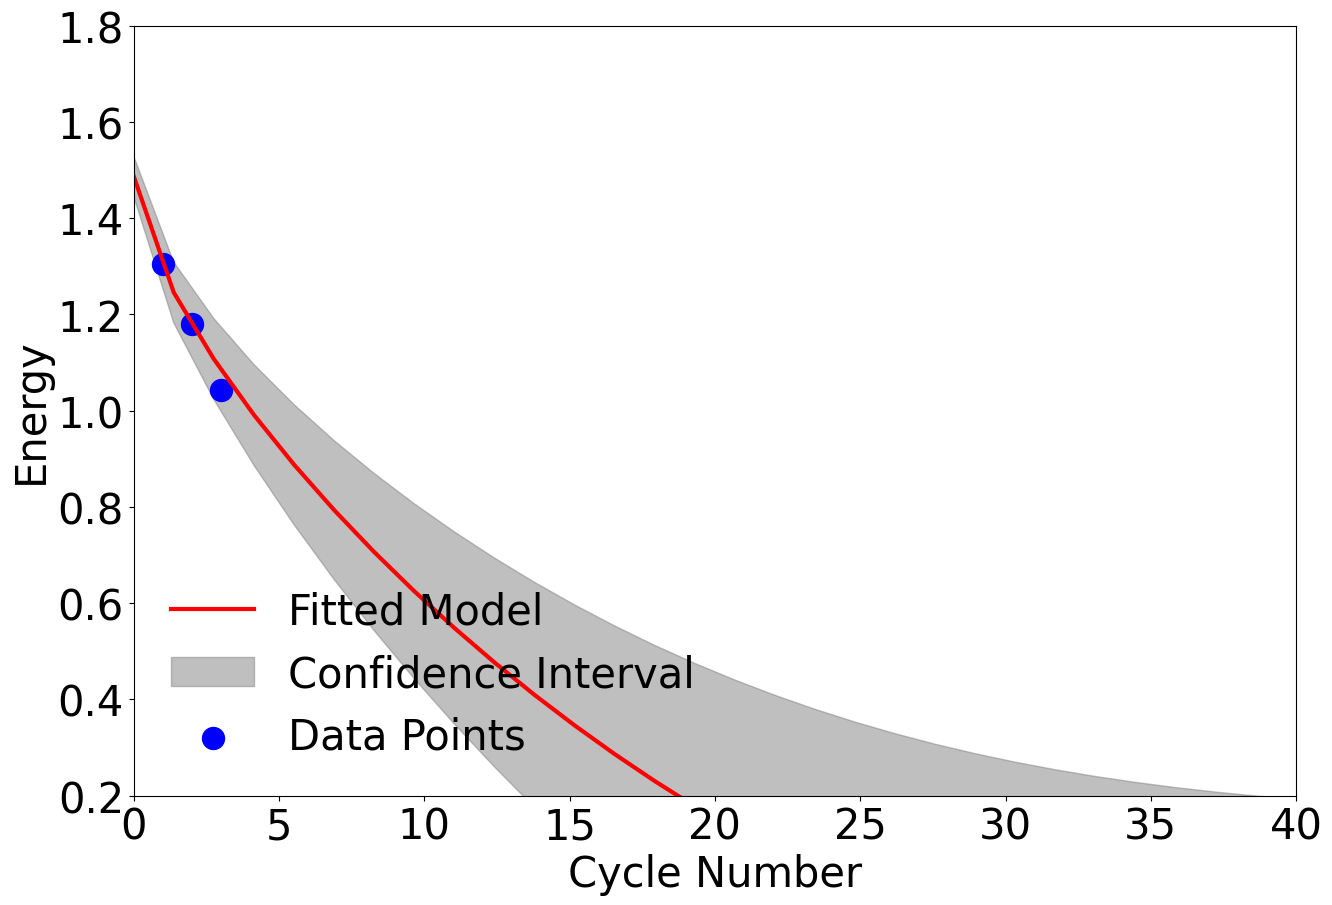

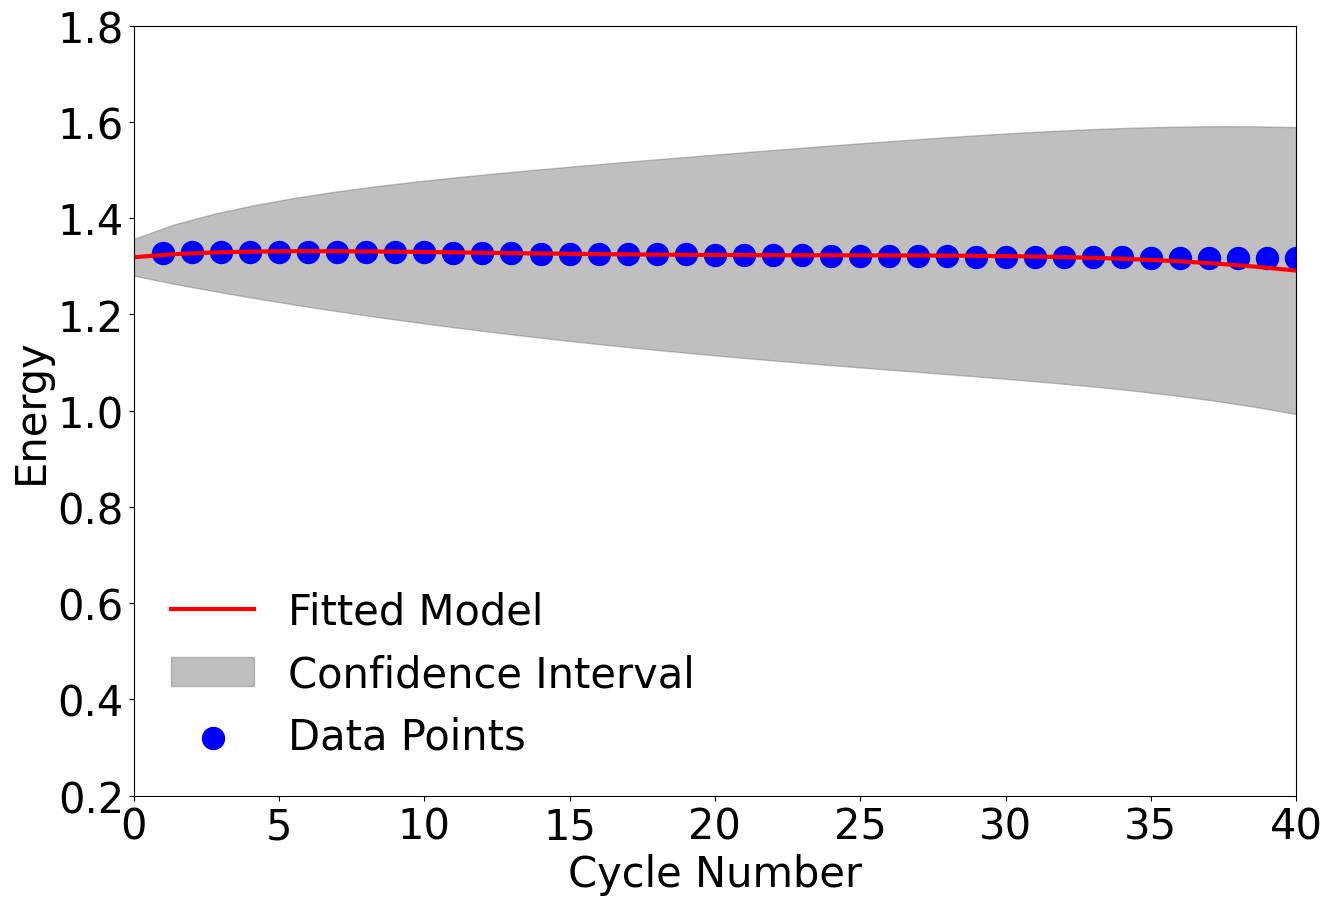

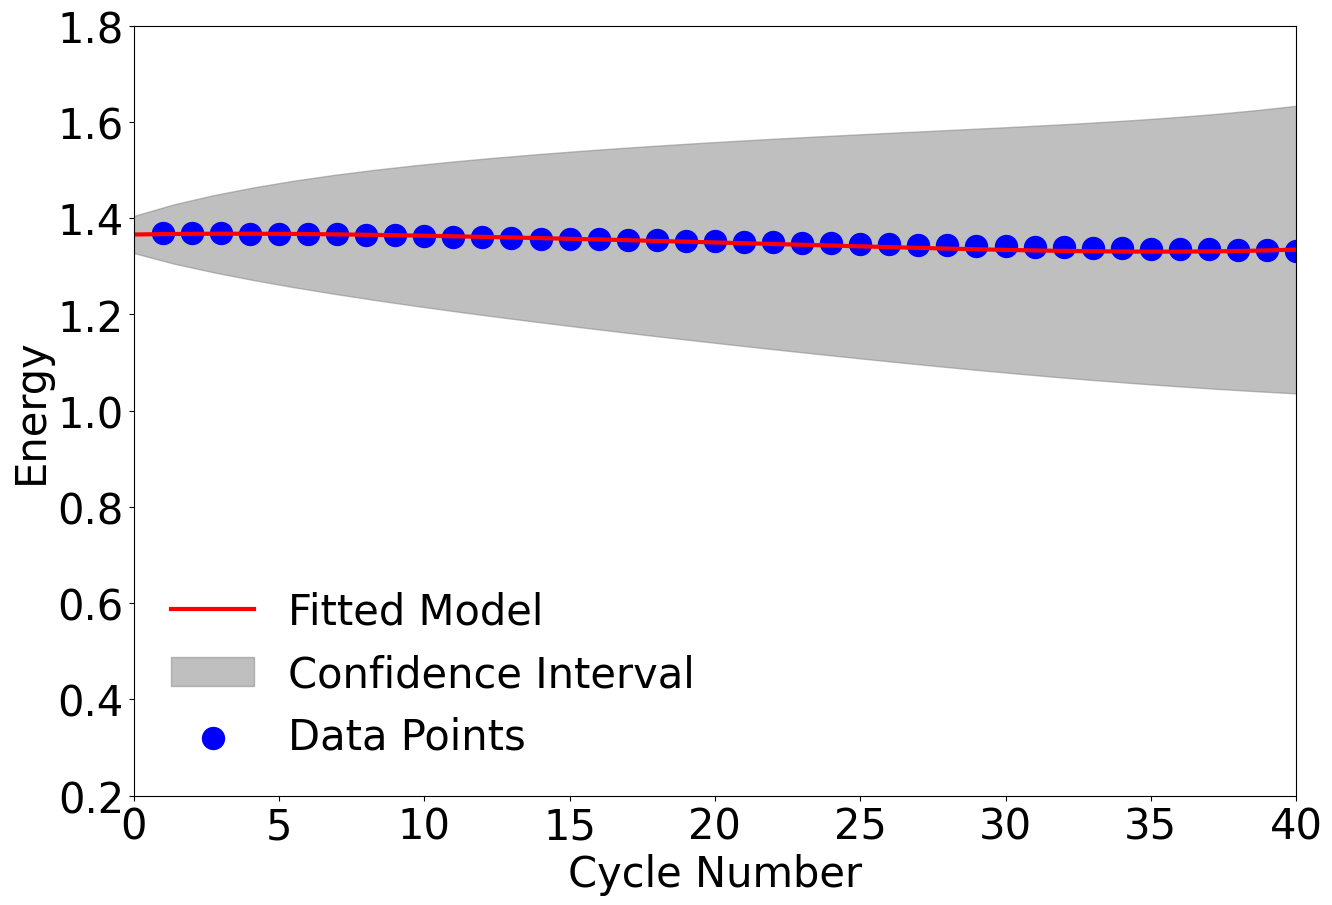

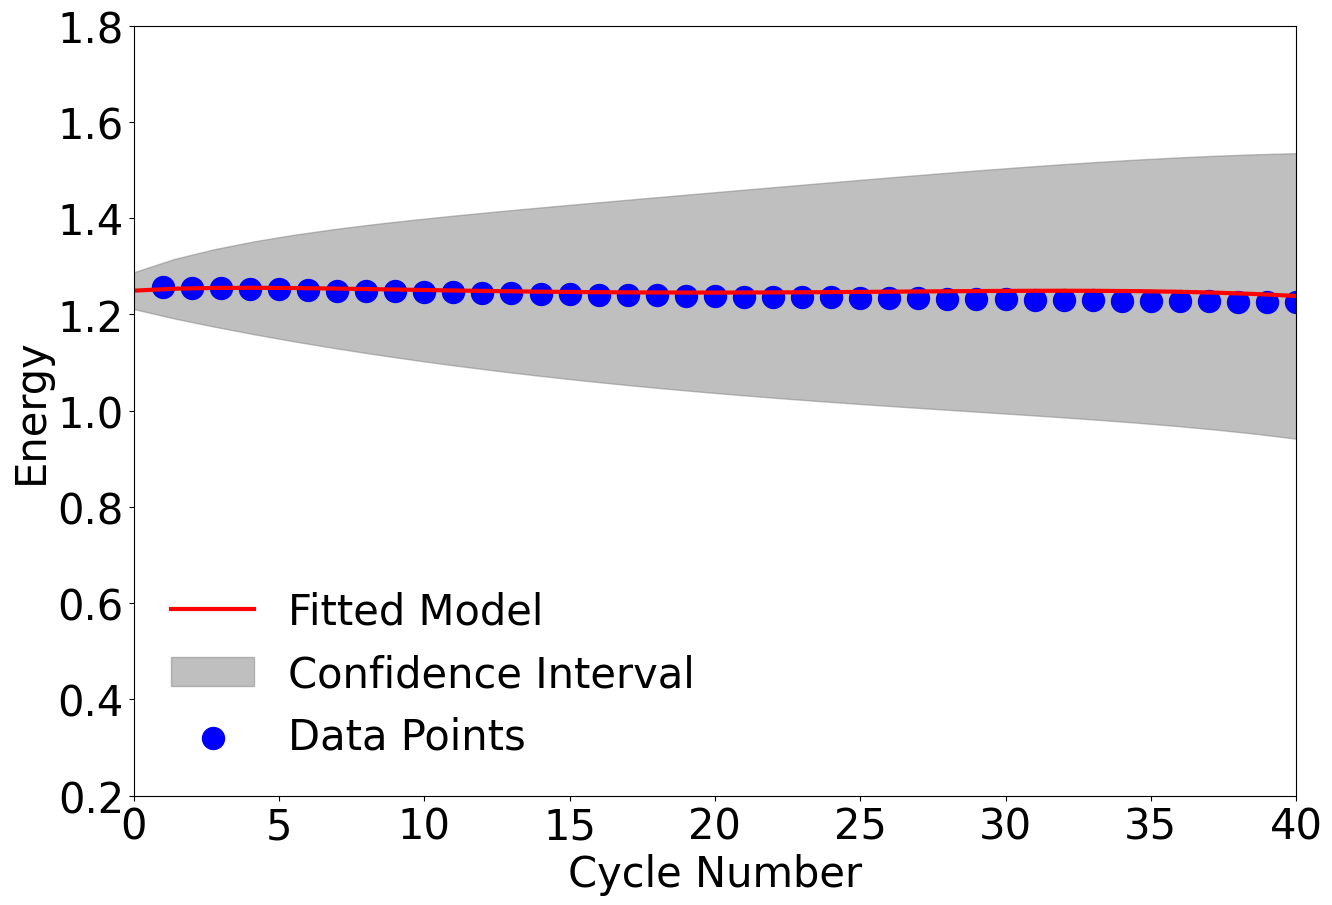

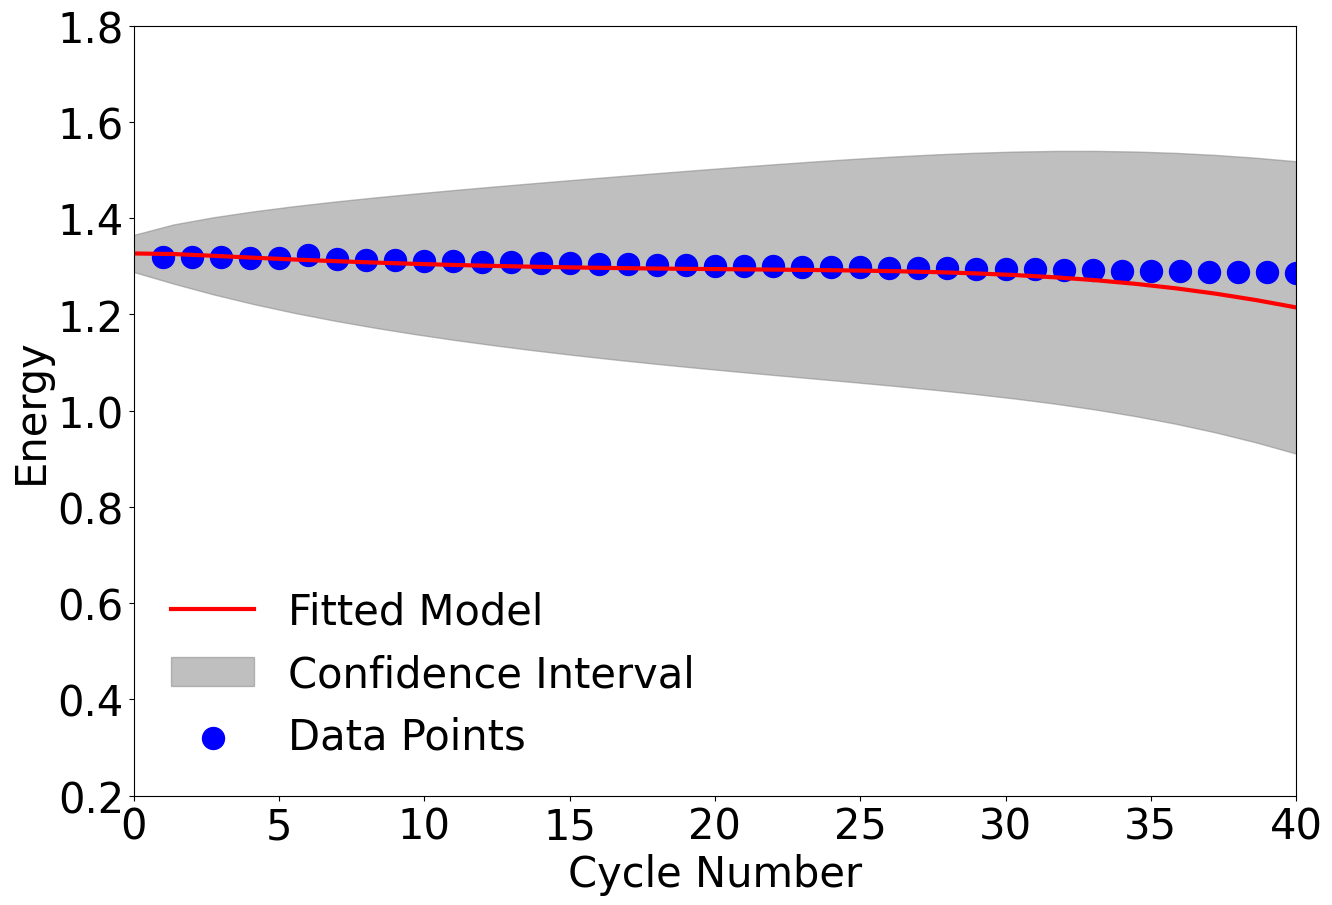

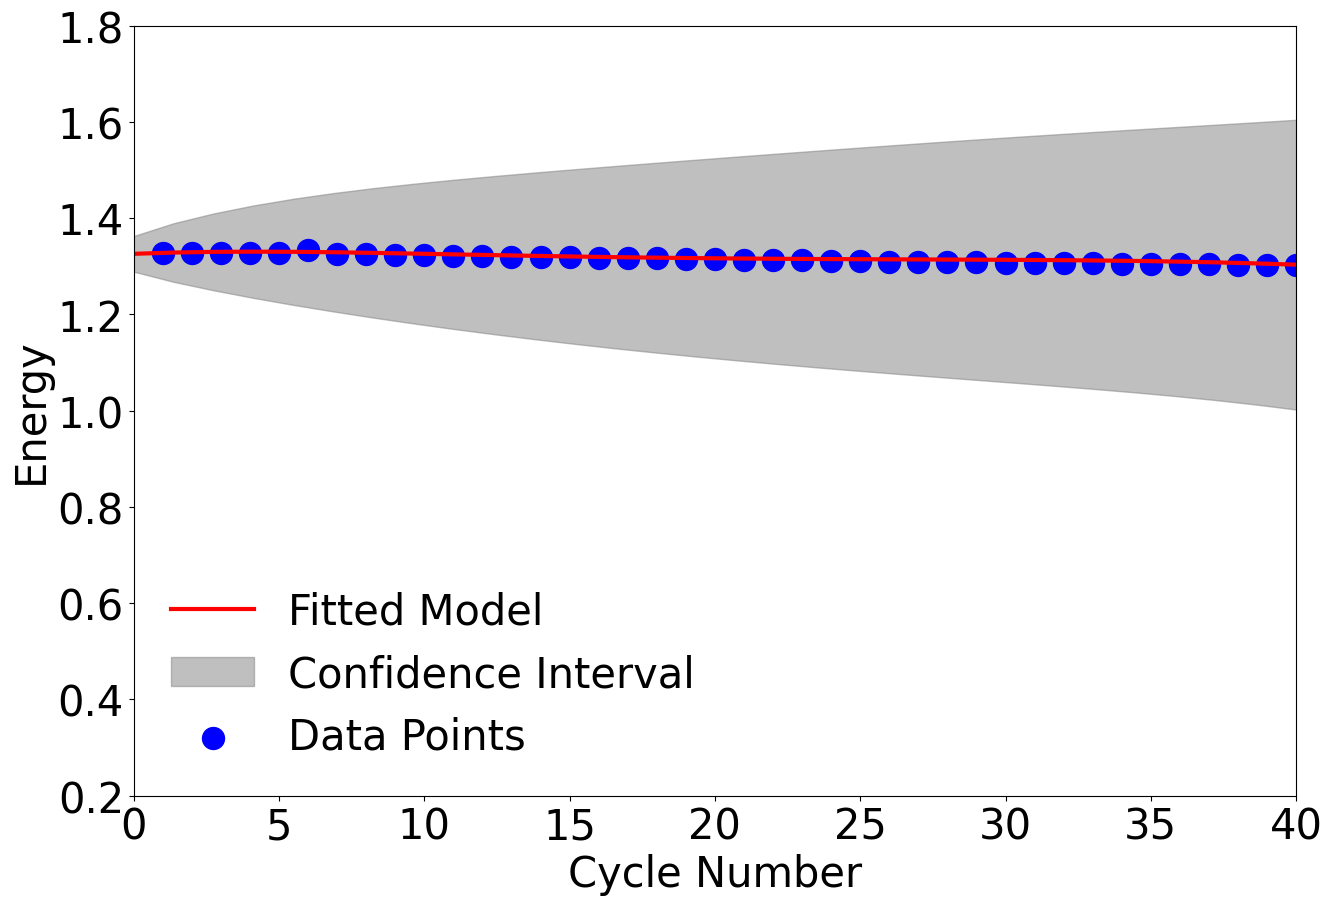

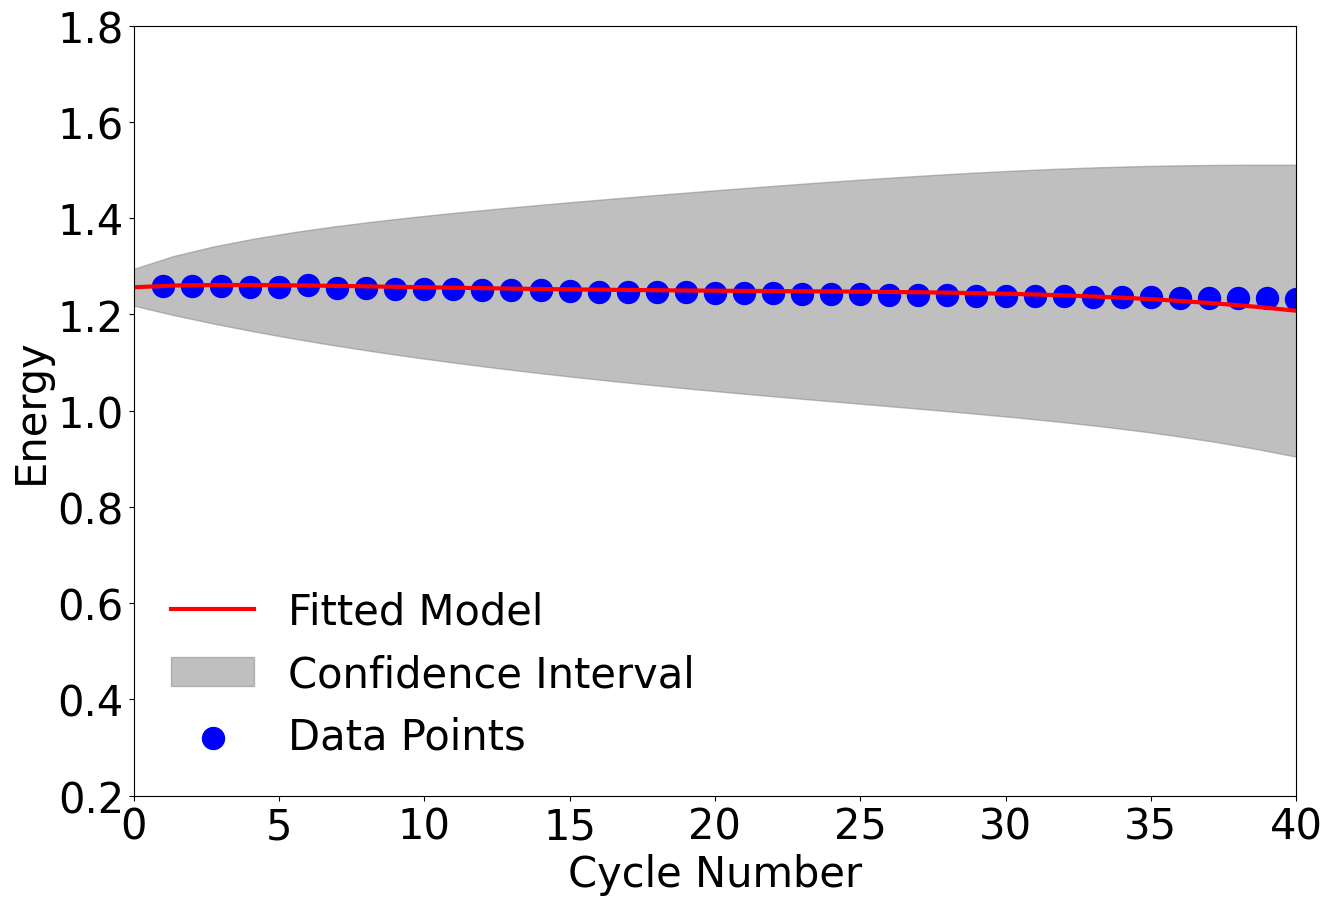

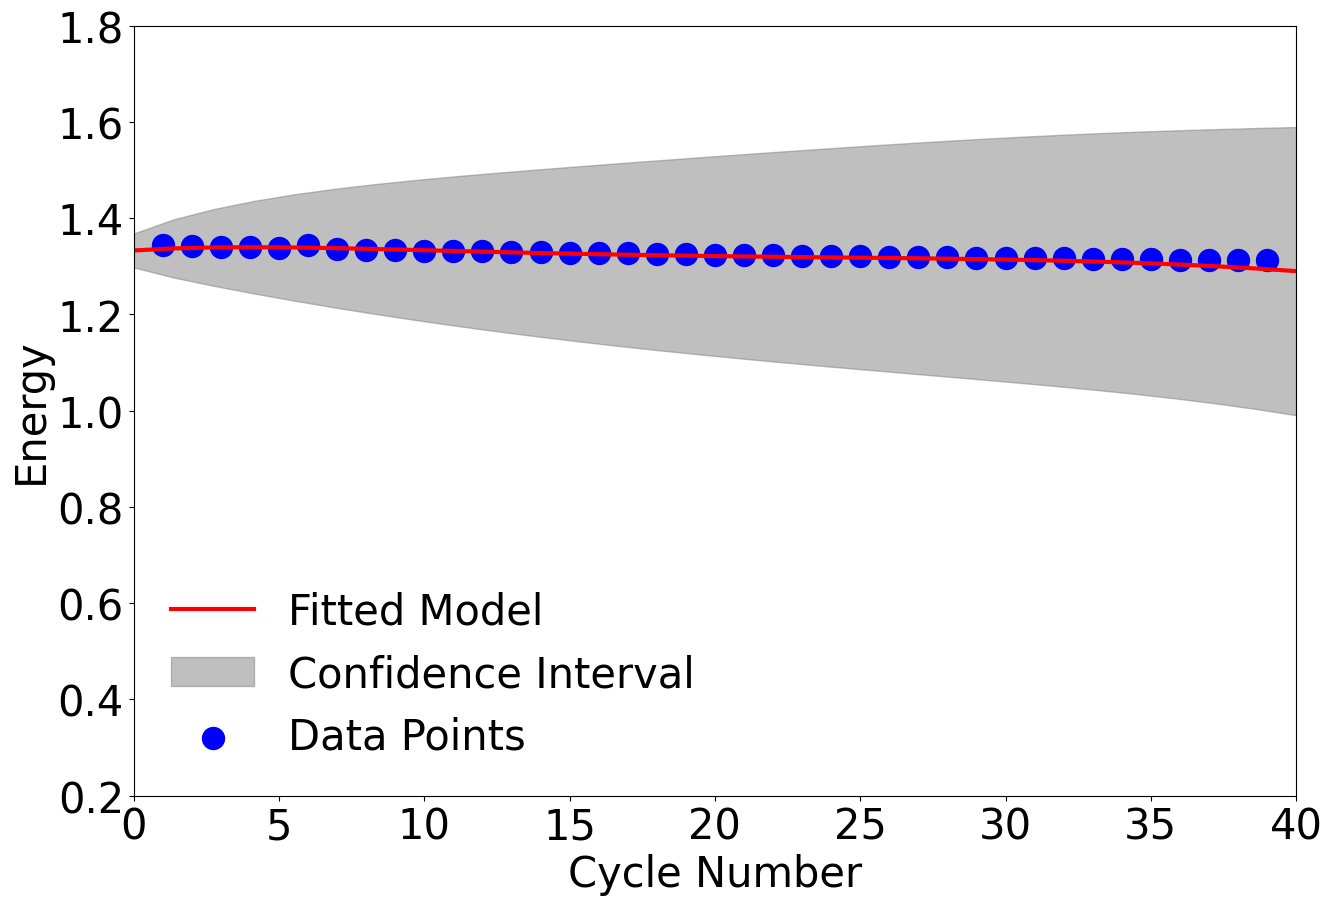

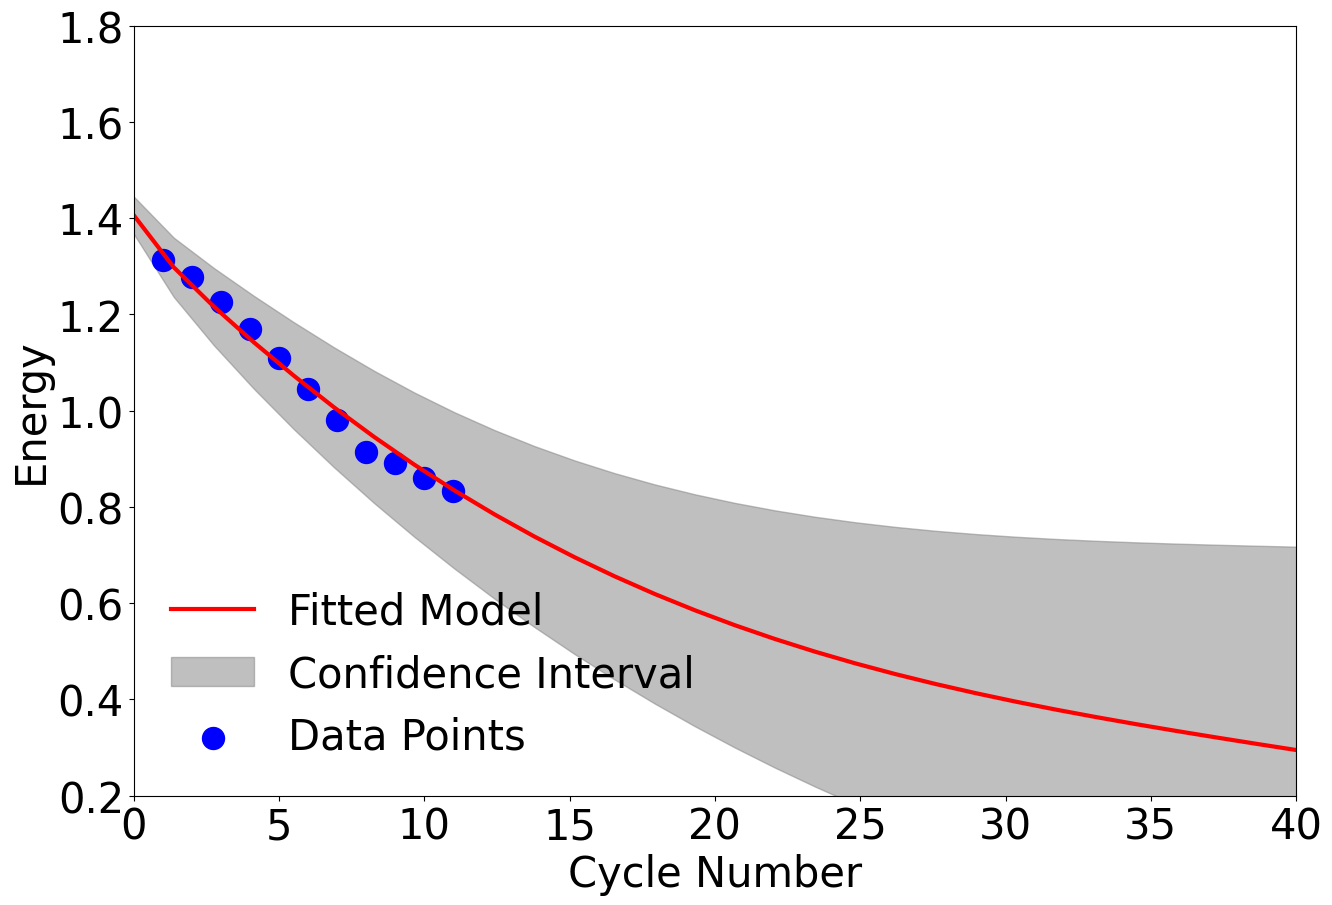

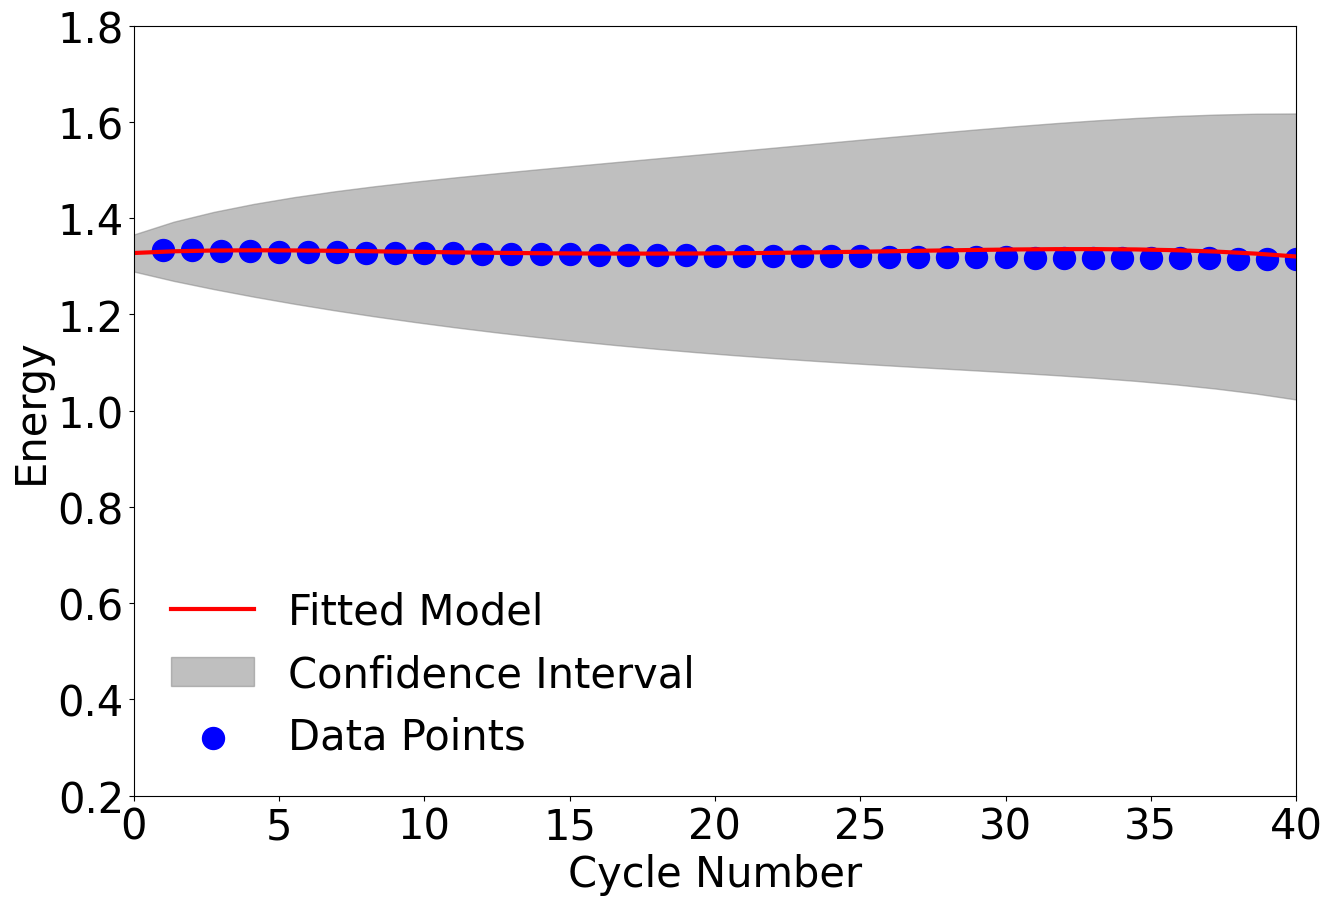

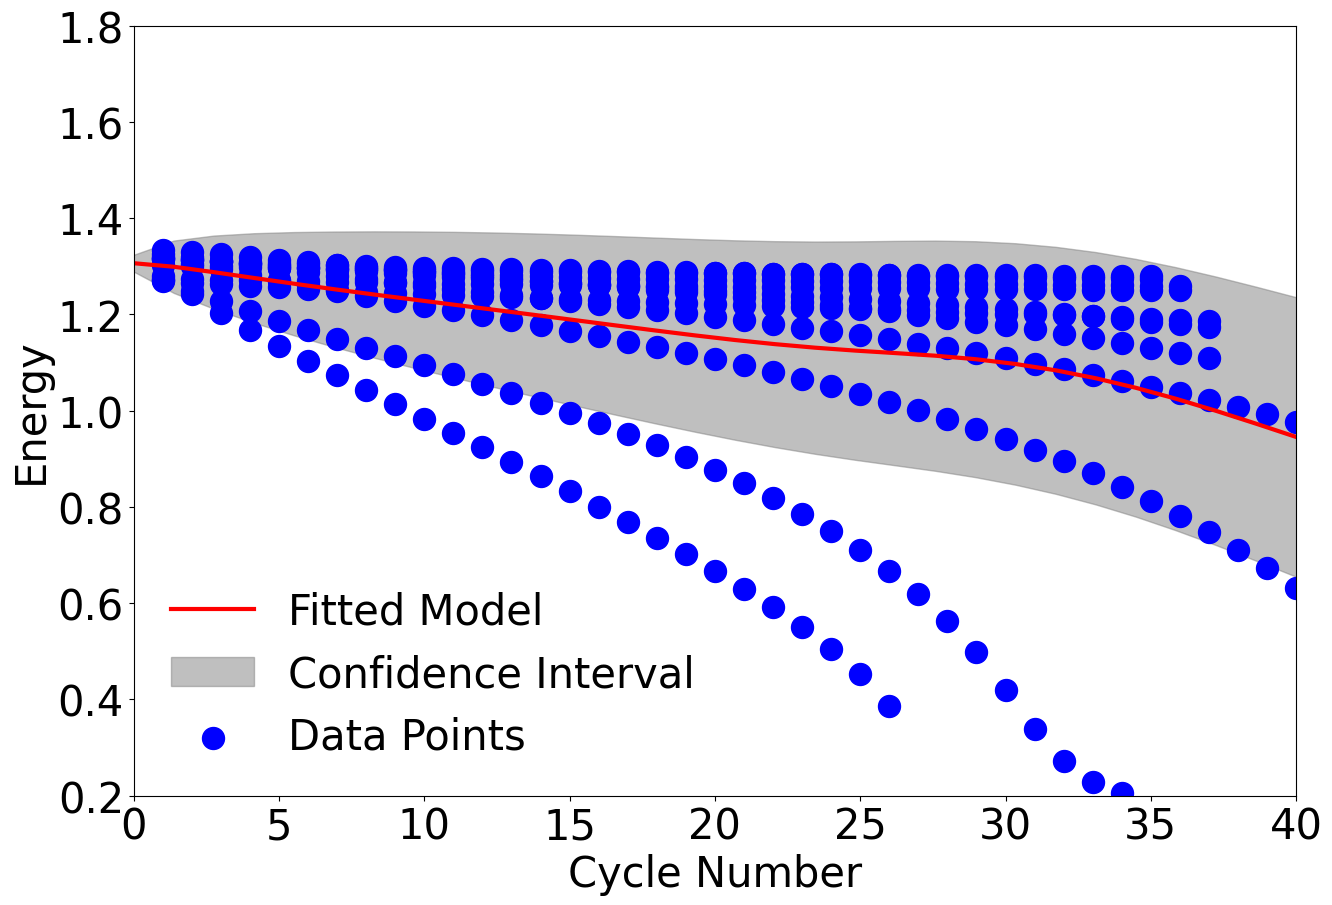

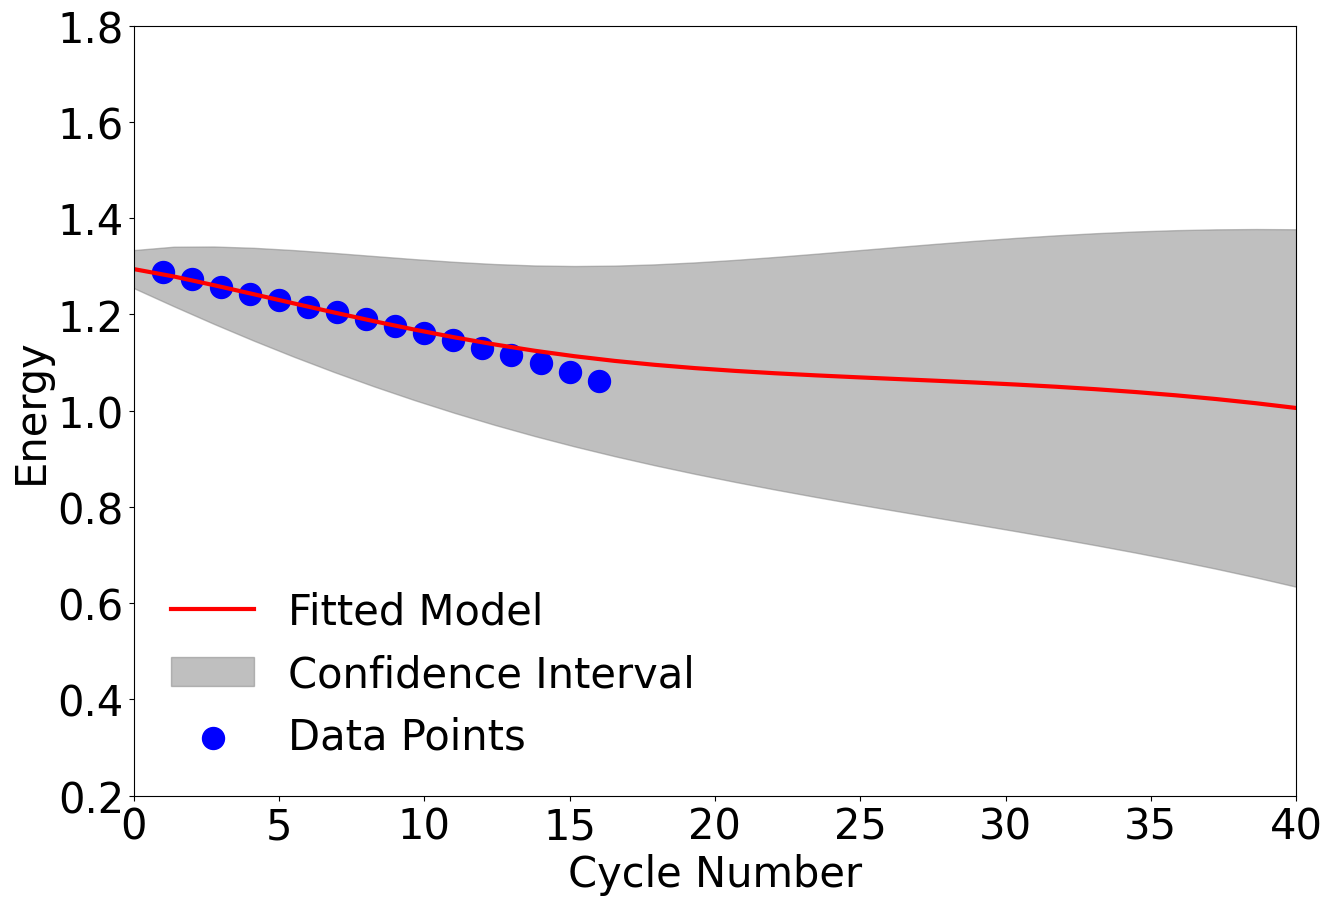

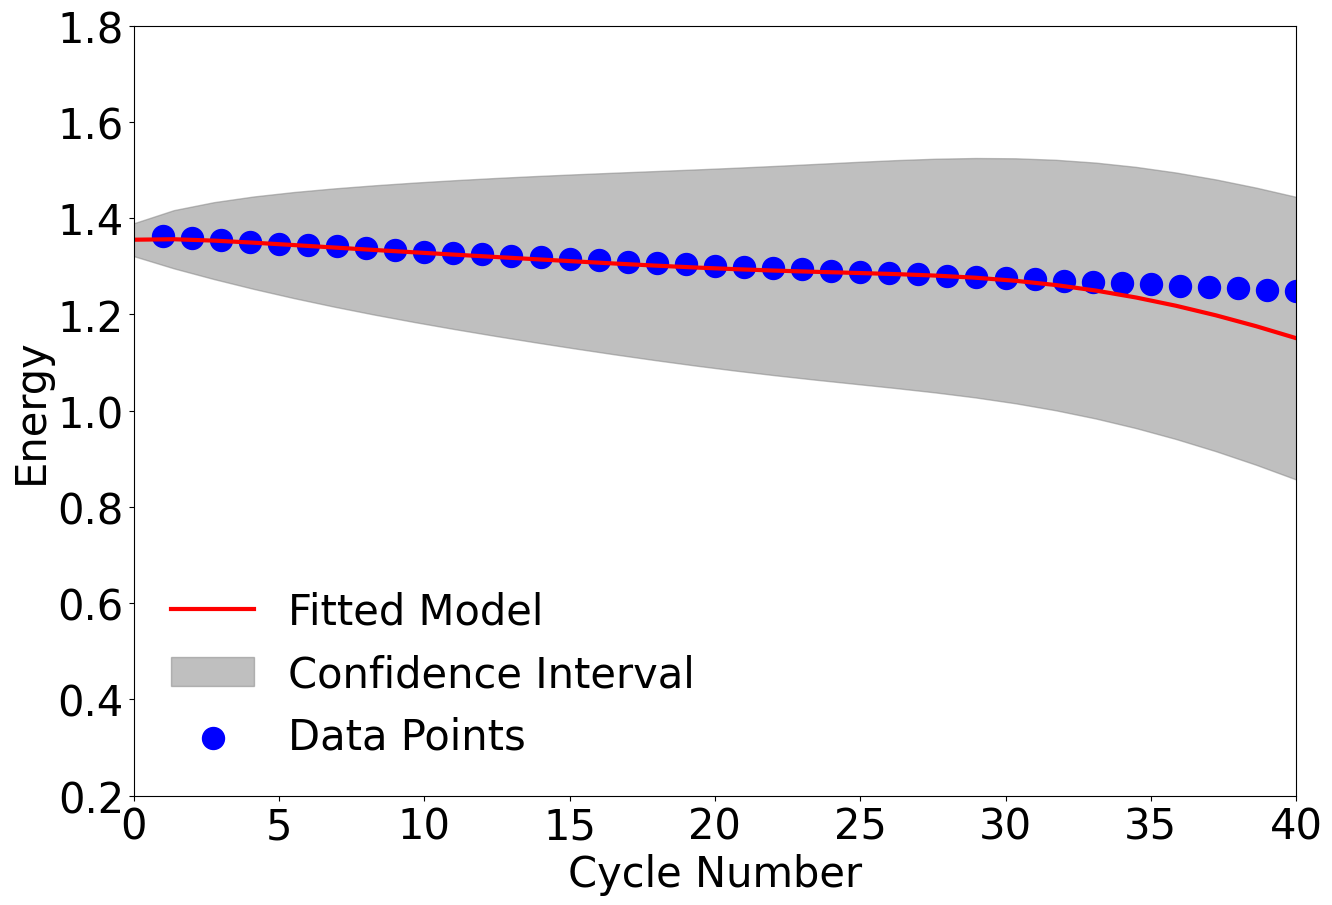

In [16]:
# This is the same as above, but in a more efficient way without calculating the posterior mean 
# and uncertainty in the whole space

crate_soc_data_285 = np.array([[4.08,55],[3.29,32.5],[4.73,75],[6.6,25],[3,55],[3.89,52.5],[6.13,37.5],[2.07,20],[2.24,37.5],[3.2,70],[4.16,22.5],[5.77,27.5],[3.9,77.5],[6.03,35],[4.44,50] ,[6.1,52.5]])
crate_soc_data_288 = np.array([[3.53,56.04],[2.47,27.04],[4.9,51.85],[6.1,38.14],[7.21,47.72],[5.77,45.6],[7.68,34.8],[2.62,29.84],[3.28,52.23],[5.22,45.99],[6.05,71.24],[3.48,27.63],[2.43,39.43],[3.22,78.47],[7.81,71.74],[3.78,41.34]])
crate_soc_data_291 = np.array([[6.88,75],[2.36,25],[6.52,27.5],[7.92,72.5],[5.32,37.5],[3.06,22.5],[4.52,45],[5.1,62.5],[2.02,62.5],[2.82,75],[2.2,67.5],[6.32,77.5],[6.09,20],[7.46,30],[4.19,80],[7.32,25]])

label_size =30

for i in range(16):
    index_of_interest = i

    soc_of_interest = crate_soc_data_291[index_of_interest,1]
    crate_of_interest = crate_soc_data_291[index_of_interest,0]
    temp_of_interest = 291

    #########################################################
    
    # Define the repeated entries for the first three columns
    repeated_entries = np.array([[soc_of_interest, crate_of_interest, temp_of_interest]])

    # Repeat the entries to match the number of rows
    first_three_columns = np.tile(repeated_entries, (n, 1))

    # Create the fourth column using np.linspace
    fourth_column = np.linspace(loop_low, loop_high, n).reshape(-1, 1)

    # Combine the first three columns with the fourth column
    my_modified_space = np.hstack((first_three_columns, fourth_column))

    my_modified_space_normalized = scaler.transform(my_modified_space)
    
    #########################################################
    
    pred_mean = my_gpo_a.posterior_mean(my_modified_space_normalized)["f(x)"]

    pred_uncertainty = my_gpo_a.posterior_covariance(my_modified_space_normalized, add_noise=True)["v(x)"]

    #########################################################
    
    my_indices = np.where((x_data[:,0] == soc_of_interest) & (x_data[:,1] == crate_of_interest) & (x_data[:,2] == temp_of_interest))
    x_data_to_be_plotted = x_data[my_indices[0],3]
    y_data_to_be_plotted = y_data[my_indices[0]]

    #######################################################################
    # Plotting the data
    plt.figure(figsize = (15,10))
    plt.plot(fourth_column[:,0],pred_mean, color = "red", linewidth = 3,label='Fitted Model')
    plt.fill_between(fourth_column[:,0],pred_mean - 2. * np.sqrt(pred_uncertainty), pred_mean + 2. * np.sqrt(pred_uncertainty), alpha = 0.5, color = "grey", label='Confidence Interval')
    plt.scatter(x_data_to_be_plotted,y_data_to_be_plotted, color = "blue",s = 250, label='Data Points') # Training Data
    plt.xlabel("Cycle Number",fontsize=label_size) 
    plt.ylabel("Energy",fontsize=label_size)
    plt.ylim(0.2,1.8)
    #plt.yticks([150, 200, 250, 300, 350])
    plt.xlim(0,40)
    #plt.xticks([0,150,300,450,600])
    plt.legend(fontsize=label_size,frameon=False,loc='lower left')
    plt.tick_params(axis='both', which='major', labelsize=label_size) # Set the font size of the tick labels on the x and y axes
    plt.show()
    

# Prediction Fitness

In [17]:
# Log marginal Likelihood
gp_likelihood = my_gpo_a.log_likelihood()

print("Likelihood: ", gp_likelihood)


Likelihood:  1486.3278913870006


# Sequence of Removing a cell at a time and Testing Performance

In [ ]:
# Create the folder for the cross validation
new_folder_path = f"Cross Validation Mean Powerlaw Noise Linear"
os.makedirs(new_folder_path, exist_ok=True)

%cd {new_folder_path}


my_trained_hps = np.array([ 2.05359454e-01,  1.09905444e+00,  6.17617240e-01,  1.73893855e+00,
        1.86982200e+00,  2.05318276e-02,  4.87126750e-06, -7.10404783e-01,
       -1.33953193e+00,  9.77999573e-01, -6.92675256e-01, -9.08445224e-01,
       -9.62824434e-01,  2.14067129e-01,  2.13589859e+00,  7.28711213e-04,
        5.44933105e-01,  2.04797457e-01,  1.25915023e+00])


# Now, you can find unique rows based on these combinations
unique_rows = combined_data.drop_duplicates(subset='Cell ID')
    

# Number of cells that I want to remove from training to be then used in testing
num_of_cells_to_test = 1

# Splitting dataset to training and testing

########
# Old way... Problematic because it results in repetitive results
#np.random.seed(42)  
#random_index_all = np.random.randint(0, len(unique_rows),size=50)
########

# Another method for random indices to ensure no repetitions, for now I am not using it
#random.seed(42)
#unique_random_numbers = random.sample(range(0, len(unique_rows)), 50)

my_ind_to_run = np.array([1,29,43])



#with open("Prediction_Fitness.csv", 'w', newline='') as file:
#    writer = csv.writer(file)
#    headers = ['Counter', 'Removed Cell', 'Size of Removed Cell', 'Log Likelihood', 'RMSE', 'CRPS']
#    writer.writerow(headers)

#if os.path.exists("Trained Hyperparameters.csv"):
#    # Delete the file
#    os.remove("Trained Hyperparameters.csv")
    
my_counter = 21 

for my_ind in my_ind_to_run:
    
    print("Removed Cell ID: ", my_ind)
    print("Trial: ", my_counter)

    random_index = my_ind #  random_index_all[my_counter] # np.random.randint(0, len(unique_rows),size=num_of_cells_to_test)
    specific_set = unique_rows.iloc[random_index]['Cell ID']

    # If specific_set is a pandas Series (multiple values), convert it to a list
    if isinstance(specific_set, pd.Series):
        specific_set = specific_set.tolist()
    elif not isinstance(specific_set, list):  # Ensure specific_set is always a list
        specific_set = [specific_set]

    #######################################
    # Extracting Testing Data:
    # Filter testing_data for rows where 'unique_combination' matches any in specific_set
    testing_data = combined_data[combined_data['Cell ID'].isin(specific_set)]

    # Extract the data columns
    loop_number = testing_data['Loop Number'].to_numpy()
    c_rate = testing_data['C-rate'].to_numpy()
    soc = testing_data['SOC [%]'].to_numpy()
    temp = testing_data['Temperature (K)'].to_numpy()
    discharge_energy = testing_data['Discharge Energy (Wh)'].to_numpy()

    # Create the x_data and y_data arrays
    x_data_testing_all = np.column_stack((soc, c_rate, temp, loop_number))
    y_data_testing_all = np.array(discharge_energy)

    # Removing the data where the Discharge Energy is 0
    condition = y_data_testing_all > 0.08
    x_data_testing = np.array(x_data_testing_all[condition,:])
    y_data_testing = np.array(y_data_testing_all[condition])

    # Transform the data
    x_data_testing_normalized = scaler.transform(x_data_testing)

    #######################################
    # Extracting Training Data:
    # Filter training_data for rows where 'unique_combination' does not match any in specific_set
    training_data = combined_data[~combined_data['Cell ID'].isin(specific_set)]

    # Extract the data columns
    loop_number = training_data['Loop Number'].to_numpy()
    c_rate = training_data['C-rate'].to_numpy()
    soc = training_data['SOC [%]'].to_numpy()
    temp = training_data['Temperature (K)'].to_numpy()
    discharge_energy = training_data['Discharge Energy (Wh)'].to_numpy()

    # Create the x_data and y_data arrays
    x_data_training_all = np.column_stack((soc, c_rate, temp, loop_number))
    y_data_training_all = np.array(discharge_energy)

    # Removing the data where the Discharge Energy is 0
    condition = y_data_training_all > 0.08
    x_data_training = np.array(x_data_training_all[condition,:])
    y_data_training = np.array(y_data_training_all[condition])

    # Transform the data
    x_data_trainging_normalized = scaler.transform(x_data_training)

    #######################################
    # GP Modeling

    my_gpo_PartialData = GPOptimizer(x_data_trainging_normalized,y_data_training,
                         init_hyperparameters = my_trained_hps,  # we need enough of those for kernel, noise and prior mean functions
                         hyperparameter_bounds =bounds,
                         #noise_variances=np.ones(y_data_training.shape) * 0.001, #provding noise variances and a noise function will raise a warning 
                         compute_device='cpu', 
                         #gp_kernel_function=kernel, 
                         #gp_kernel_function_grad=None, 
                         gp_mean_function=mean2, 
                         gp_mean_function_grad=None,
                         gp_noise_function=my_noise)

    my_gpo_PartialData.train(hyperparameter_bounds = bounds, method='global')

    print("Training Complete")

    # Saving Trained Hyperparameters
    row_hyperparameters = [my_counter] +  list(my_gpo_PartialData.hyperparameters)

    # Write the row_entropies to the CSV file
    csv_file = open("Trained Hyperparameters.csv", 'a', newline='')
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(row_hyperparameters)
    csv_file.close() # Close the CSV file
        
    #######################################
    # Prediction Fitness 

    # Log marginal Likelihood
    gp_likelihood = my_gpo_PartialData.log_likelihood()

    # RMSE
    my_rmse = my_gpo_PartialData.rmse(x_data_testing_normalized,y_data_testing)

    # CRPS
    my_crps = my_gpo_PartialData.crps(x_data_testing_normalized,y_data_testing)


    # Create a row with the extracted values
    values_to_write = [my_counter, random_index, len(y_data_testing), gp_likelihood, my_rmse, my_crps]
      
    with open("Prediction_Fitness.csv", 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(values_to_write)
            
    #######################################       
    #######################################
    #######################################
    
    soc_of_interest = x_data_testing[0,0]
    crate_of_interest = x_data_testing[0,1]
    temp_of_interest = x_data_testing[0,2]

    
    # Define the repeated entries for the first three columns
    repeated_entries = np.array([[soc_of_interest, crate_of_interest, temp_of_interest]])

    # Repeat the entries to match the number of rows
    first_three_columns = np.tile(repeated_entries, (n, 1))

    # Create the fourth column using np.linspace
    fourth_column = np.linspace(loop_low, loop_high, n).reshape(-1, 1)

    # Combine the first three columns with the fourth column
    my_modified_space = np.hstack((first_three_columns, fourth_column))

    my_modified_space_normalized = scaler.transform(my_modified_space)
    
    #########################################################
    
    pred_mean = my_gpo_a.posterior_mean(my_modified_space_normalized)["f(x)"]

    pred_uncertainty = my_gpo_a.posterior_covariance(my_modified_space_normalized, add_noise=True)["v(x)"]

    #######################################################################

    # Data points
    x_data_to_be_plotted = x_data_testing[:,3]
    y_data_to_be_plotted = y_data_testing
    
    #######################################################################

    # Plotting the data
    plt.figure(figsize = (15,10))
    plt.plot(fourth_column[:,0],pred_mean, color = "red", linewidth = 3,label='Fitted Model')
    plt.fill_between(fourth_column[:,0],pred_mean - 2. * np.sqrt(pred_uncertainty), pred_mean + 2. * np.sqrt(pred_uncertainty), alpha = 0.5, color = "grey", label='Confidence Interval')
    plt.scatter(x_data_to_be_plotted,y_data_to_be_plotted, color = "blue",s = 250, label='Data Points') # Training Data
    plt.xlabel("Cycle Number",fontsize=label_size) 
    plt.ylabel("Energy",fontsize=label_size)
    plt.ylim(0.2,1.8)
    #plt.yticks([150, 200, 250, 300, 350])
    plt.xlim(0,40)
    #plt.xticks([0,150,300,450,600])
    #plt.legend(fontsize=label_size,frameon=False,loc='lower left')
    plt.tick_params(axis='both', which='major', labelsize=label_size) # Set the font size of the tick labels on the x and y axes
    plt.savefig(f"my_plot_{my_counter}.png") # saving plot with a unique name 
    #plt.savefig(f"Plots/my_plot_{my_counter}.pdf", bbox_inches='tight')
    plt.close() 

    my_counter = my_counter +1
    
%cd ..